In [5]:
%load_ext autoreload
%autoreload 2

from pandas import DataFrame
from pathlib import Path
import sys
from matplotlib.pyplot import figure, savefig, show
from seaborn import heatmap
from utils.dslabs_functions import get_variable_types

project_dir = Path.cwd().parent  
sys.path.append(str(project_dir))
from utils.data_loader import DataLoader


dataloader = DataLoader()
data, target = dataloader.get_security_classification_dataset_and_target()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


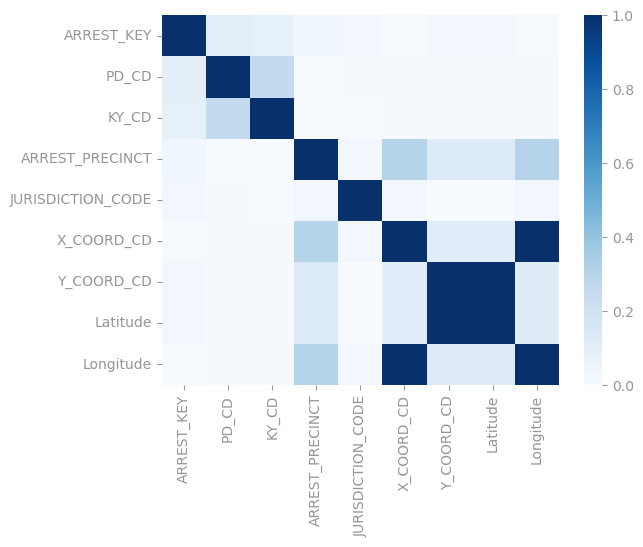

In [6]:


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
file_tag = "security_classification"
savefig(f"images/{file_tag}_correlation_analysis.png")
show()